In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

Dataset merupakan data Pima Indian Diabet dari Kaggle

In [130]:
#Mengimport data
datmin = pd.read_csv('diabetes.csv',sep=",")
datmin.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [131]:
datmin.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [132]:
datmin.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


D:\Application\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


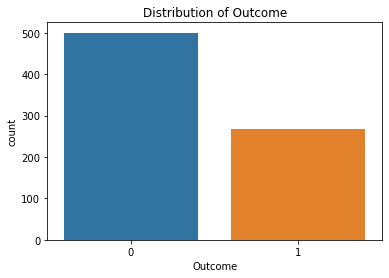

In [133]:
sns.countplot(datmin['Outcome']).set_title('Distribution of Outcome')
plt.show()

# Skewness

In [134]:
datatr=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
datmin[datatr].skew(axis=0, skipna=True)

Glucose          0.173754
BloodPressure   -1.843608
SkinThickness    0.109372
Insulin          2.272251
BMI             -0.428982
dtype: float64

In [135]:
df1=datmin.loc[datmin['Outcome']==0]
df2=datmin.loc[datmin['Outcome']==1]

In [136]:
df1[datatr].skew(axis=0, skipna=True)

Glucose          0.173111
BloodPressure   -1.809825
SkinThickness    0.031155
Insulin          2.498741
BMI             -0.665902
dtype: float64

In [137]:
df2[datatr].skew(axis=0, skipna=True)

Glucose         -0.495557
BloodPressure   -1.943633
SkinThickness    0.115910
Insulin          1.843831
BMI              0.000597
dtype: float64

In [138]:
df1[datatr].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,500.0000,500.000000,500.000000,500.000000,500.000000
mean,109.9800,68.184000,19.664000,68.792000,30.304200
std,26.1412,18.063075,14.889947,98.865289,7.689855
min,0.0000,0.000000,0.000000,0.000000,0.000000
25%,93.0000,62.000000,0.000000,0.000000,25.400000
50%,107.0000,70.000000,21.000000,39.000000,30.050000
75%,125.0000,78.000000,31.000000,105.000000,35.300000
max,197.0000,122.000000,60.000000,744.000000,57.300000


In [139]:
df2[datatr].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,141.257463,70.824627,22.164179,100.335821,35.142537
std,31.939622,21.491812,17.679711,138.689125,7.262967
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,119.000000,66.000000,0.000000,0.000000,30.800000
50%,140.000000,74.000000,27.000000,0.000000,34.250000
75%,167.000000,82.000000,36.000000,167.250000,38.775000
max,199.000000,114.000000,99.000000,846.000000,67.100000


# **Preprocessing**

In [140]:
#Mengidentifikasi nilai tak wajar sebagai missing value

datmin['Glucose']=datmin['Glucose'].replace(0,np.nan)
datmin['BloodPressure']=datmin['BloodPressure'].replace(0,np.nan)
datmin['SkinThickness']=datmin['SkinThickness'].replace(0,np.nan)
datmin['Insulin']=datmin['Insulin'].replace(0,np.nan)
datmin['BMI']=datmin['BMI'].replace(0,np.nan)
datmin.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Missing Value

In [141]:
#cek missing value
total=datmin.isnull().sum().sort_values(ascending = False)
print(total)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Outcome                       0
Age                           0
DiabetesPedigreeFunction      0
Pregnancies                   0
dtype: int64


Sebelum melakukan imputasi pada nilai missing, dicek terlebih dahulu skewness dari data, untuk menentukan imputasi yang tepat

## Imputasi Missing Value


In [142]:
#imputasi class mean pada attribute Glucose dan Insulin
df1['Glucose'].fillna(df1['Glucose'].mean(),inplace=True)
df2['Glucose'].fillna(df2['Glucose'].mean(),inplace=True)

D:\Application\Anaconda\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [143]:
df1['Insulin'].fillna(df1['Insulin'].median(),inplace=True)
df2['Insulin'].fillna(df2['Insulin'].median(),inplace=True)
datmin2=df1.append(df2)
datmin2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [144]:
#Imputasi Mean pada bloodpressure, skinthickness, dan BMI
mean1=datmin2['BloodPressure'].mean()
datmin2['BloodPressure'].fillna(mean1,inplace=True)
mean2=datmin2['SkinThickness'].mean()
datmin2['SkinThickness'].fillna(mean2,inplace=True)
mean3=datmin2['BMI'].mean()
datmin2['BMI'].fillna(mean3,inplace=True)

In [145]:
datmin2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [146]:
#Ckecking Missing Value
total=datmin2.isnull().sum().sort_values(ascending = False)
print(total)

Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
Glucose                     0
Pregnancies                 0
dtype: int64


## Outlier

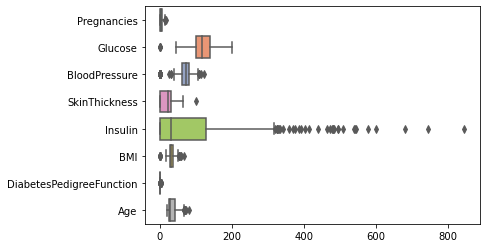

In [147]:
#Cek outlier menggunakan boxplot
datat=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
ax = sns.boxplot(data=datmin2[datat], orient="h", palette="Set2")

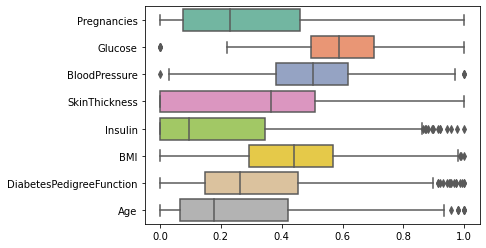

In [148]:
ax = sns.boxplot(data=datscale[datat], orient="h", palette="Set2")

### Univariate

In [149]:
#membuat fungsi deteksi outlier univariat
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1-(1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [150]:
lowerbound,upperbound = outlier_treatment(datmin2['Pregnancies'])
datmin2[(datmin2['Pregnancies'] < lowerbound) | (datmin2['Pregnancies'] > upperbound)].index

Int64Index([88, 159, 298, 455], dtype='int64')

In [151]:
lowerbound,upperbound = outlier_treatment(datmin2['Glucose'])
datmin2[(datmin2['Glucose'] < lowerbound) | (datmin2['Glucose'] > upperbound)].index

Int64Index([75, 182, 342, 349, 502], dtype='int64')

In [152]:
lowerbound,upperbound = outlier_treatment(datmin2['BloodPressure'])
datmin2[(datmin2['BloodPressure'] < lowerbound) | (datmin2['BloodPressure'] > upperbound)].index

Int64Index([  7,  18,  49,  60,  81, 106, 172, 222, 336, 347, 362, 426, 430,
            453, 494, 522, 533, 549, 589, 597, 601, 643, 697, 703,  15,  43,
             78,  84, 125, 177, 193, 261, 266, 269, 300, 332, 357, 435, 468,
            484, 535, 604, 619, 691, 706],
           dtype='int64')

In [153]:
lowerbound,upperbound = outlier_treatment(datmin2['SkinThickness'])
datmin2[(datmin2['SkinThickness'] < lowerbound) | (datmin2['SkinThickness'] > upperbound)].index

Int64Index([579], dtype='int64')

In [154]:
lowerbound,upperbound = outlier_treatment(datmin2['Insulin'])
datmin2[(datmin2['Insulin'] < lowerbound) | (datmin2['Insulin'] > upperbound)].index

Int64Index([ 54, 139, 153, 228, 247, 248, 258, 286, 392, 486, 519, 574, 645,
            707, 710,   8,  13, 111, 186, 220, 231, 296, 360, 370, 375, 409,
            415, 480, 584, 612, 655, 695, 715, 753],
           dtype='int64')

In [155]:
lowerbound,upperbound = outlier_treatment(datmin2['BMI'])
datmin2[(datmin2['BMI'] < lowerbound) | (datmin2['BMI'] > upperbound)].index

Int64Index([ 49,  60,  81, 145, 247, 371, 426, 494, 522, 673, 684,   9, 120,
            125, 177, 193, 303, 445, 706],
           dtype='int64')

In [156]:
lowerbound,upperbound = outlier_treatment(datmin2['DiabetesPedigreeFunction'])
datmin2[(datmin2['DiabetesPedigreeFunction'] < lowerbound) | (datmin2['DiabetesPedigreeFunction'] > upperbound)].index

Int64Index([ 12,  58, 147, 228, 330, 371, 383, 395, 534, 593, 621, 622,   4,
             39,  45, 100, 187, 218, 243, 245, 259, 292, 308, 370, 445, 606,
            618, 659, 661],
           dtype='int64')

In [157]:
lowerbound,upperbound = outlier_treatment(datmin2['Age'])
datmin2[(datmin2['Age'] < lowerbound) | (datmin2['Age'] > upperbound)].index

Int64Index([123, 453, 459, 489, 537, 674, 684, 363, 666], dtype='int64')

## Multivariate (Mahalanobis Distance)

In [158]:
#mengambil data tanpa kolom target/outcome
datout2=datmin2[['Pregnancies','Glucose','BloodPressure',
                'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]

In [159]:
#mengetahui banyak data (n)
df=len(list(datout2.columns.values))

In [160]:
#membuat fungsi mahalanobis distance
def mahalanobis(x=None, data=None, cov=None):
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [161]:
datout2['mahala'] = mahalanobis(x=datout2, data=datout2)
datout2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,mahala
1,1,85,66,29,0,26.6,0.351,31,3.609779
3,1,89,66,23,94,28.1,0.167,21,2.795023
5,5,116,74,0,0,25.6,0.201,30,3.056539
7,10,115,0,0,0,35.3,0.134,29,23.059041
10,4,110,92,0,0,37.6,0.191,30,6.313589


In [162]:
#membuat fungsi deteksi outlier MD
from scipy.stats import chi2
def MD_detectOutliers(MD,df):
    nilaichi=chi2.isf(0.01, df)
    outliers = []
    for i in range(len(MD)):
        if (MD[i] > nilaichi):
            outliers.append(i)  # index of the outlier
    return np.array(outliers)


In [163]:
outliers_indices = MD_detectOutliers(datout2['mahala'],df)

print("Outliers Indices: {}\n".format(outliers_indices))

Outliers Indices: [  4   7   8   9  13  45  49  58  60  78  81 125 145 159 177 186 193 228
 247 266 294 300 332 336 349 357 370 371 426 435 445 453 459 484 494 502
 522 537 579 584 604 655 661 684 703 706]



In [164]:
len(outliers_indices)

46

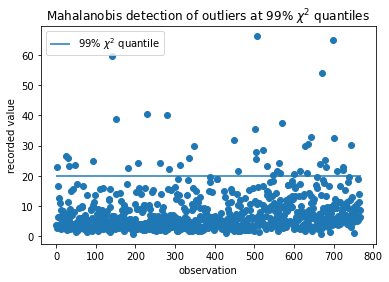

In [165]:
d2=datout2['mahala']
eks = range( len( d2 ))

plt.subplot(111)

plt.scatter( eks, d2 )

plt.hlines( chi2.ppf(0.99, df), 0, len(d2), label ="99% $\chi^2$ quantile", linestyles = "solid" )  

plt.legend()
plt.ylabel("recorded value")
plt.xlabel("observation")
plt.title( 'Mahalanobis detection of outliers at 99% $\chi^2$ quantiles' )

plt.show()

## Imputasi Outlier (Lanjutan)

In [166]:
out2=datmin2
lowerbound,upperbound = outlier_treatment(datmin2['Pregnancies'])
out2.loc[(out2['Pregnancies'] < lowerbound) | (out2['Pregnancies'] > upperbound),'Pregnancies']=np.NaN

In [167]:
lowerbound1,upperbound1 = outlier_treatment(datmin2['BloodPressure'])
out2.loc[(out2['BloodPressure'] < lowerbound1) | (out2['BloodPressure'] > upperbound1),'BloodPressure']=np.NaN
lowerbound2,upperbound2 = outlier_treatment(datmin2['SkinThickness'])
out2.loc[(out2['SkinThickness'] < lowerbound2) | (out2['SkinThickness'] > upperbound2),'SkinThickness']=np.NaN
lowerbound3,upperbound3 = outlier_treatment(datmin2['Insulin'])
out2.loc[(out2['Insulin'] < lowerbound3) | (out2['Insulin'] > upperbound3),'Insulin']=np.NaN
lowerbound4,upperbound4 = outlier_treatment(datmin2['BMI'])
out2.loc[(out2['BMI'] < lowerbound4) | (out2['BMI'] > upperbound4),'BMI']=np.NaN
lowerbound5,upperbound5 = outlier_treatment(datmin2['DiabetesPedigreeFunction'])
out2.loc[(out2['DiabetesPedigreeFunction'] < lowerbound5) | (out2['DiabetesPedigreeFunction'] > upperbound5),'DiabetesPedigreeFunction']=np.NaN
lowerbound6,upperbound6 = outlier_treatment(datmin2['Age'])
out2.loc[(out2['Age'] < lowerbound6) | (out2['Age'] > upperbound6),'Age']=np.NaN

In [168]:
out2.skew(skipna=True)

Pregnancies                 0.822757
Glucose                     0.173754
BloodPressure               0.059002
SkinThickness              -0.028838
Insulin                     1.093405
BMI                         0.253338
DiabetesPedigreeFunction    0.915180
Age                         1.023770
Outcome                     0.635017
dtype: float64

In [169]:
out2['Pregnancies'].fillna(out2['Pregnancies'].mean(),inplace=True)
out2['BloodPressure'].fillna(out2['BloodPressure'].mean(),inplace=True)
out2['SkinThickness'].fillna(out2['SkinThickness'].mean(),inplace=True)
out2['Insulin'].fillna(out2['Insulin'].mean(),inplace=True)
out2['BMI'].fillna(out2['BMI'].mean(),inplace=True)
out2['DiabetesPedigreeFunction'].fillna(out2['DiabetesPedigreeFunction'].mean(),inplace=True)
out2['Age'].fillna(out2['Age'].mean(),inplace=True)

In [170]:
lowerbound,upperbound = outlier_treatment(out2['Pregnancies'])
out2[(out2['Pregnancies'] < lowerbound) | (out2['Pregnancies'] > upperbound)].index

Int64Index([], dtype='int64')

In [171]:
lowerbound,upperbound = outlier_treatment(out2['BloodPressure'])
len(out2[(out2['BloodPressure'] < lowerbound) | (out2['BloodPressure'] > upperbound)].index)

4

In [172]:
lowerbound,upperbound = outlier_treatment(out2['SkinThickness'])
out2[(out2['SkinThickness'] < lowerbound) | (out2['SkinThickness'] > upperbound)].index

Int64Index([], dtype='int64')

In [173]:
lowerbound,upperbound = outlier_treatment(out2['Insulin'])
out2[(out2['Insulin'] < lowerbound) | (out2['Insulin'] > upperbound)].index

Int64Index([144, 162, 279, 364, 412, 713, 53, 56, 199, 206, 388, 425, 606], dtype='int64')

In [174]:
lowerbound,upperbound = outlier_treatment(out2['BMI'])
out2[(out2['BMI'] < lowerbound) | (out2['BMI'] > upperbound)].index

Int64Index([99, 155, 681], dtype='int64')

In [175]:
lowerbound,upperbound = outlier_treatment(out2['DiabetesPedigreeFunction'])
out2[(out2['DiabetesPedigreeFunction'] < lowerbound) | (out2['DiabetesPedigreeFunction'] > upperbound)].index

Int64Index([267, 416, 434, 487, 657, 744, 747, 131, 152, 270, 314, 408, 493,
            588, 750],
           dtype='int64')

In [176]:
lowerbound,upperbound = outlier_treatment(out2['Age'])
out2[(out2['Age'] < lowerbound) | (out2['Age'] > upperbound)].index

Int64Index([148, 294, 362, 495, 552, 221, 759], dtype='int64')

## After Imputasi Outlier

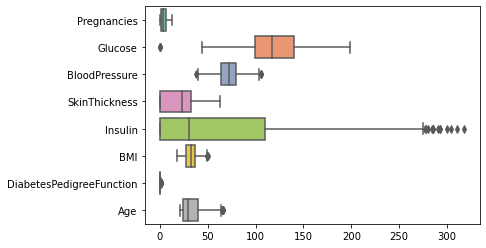

In [177]:
import seaborn as sns
datat=['Pregnancies','Glucose','BloodPressure','SkinThickness',
        'Insulin','BMI','DiabetesPedigreeFunction','Age']
ax = sns.boxplot(data=out2[datat], orient="h", palette="Set2")

In [178]:
out2['mahala'] = mahalanobis(x=out2, data=out2)
out2.head()
outliers_indices = MD_detectOutliers(out2['mahala'],df)

print("Outliers Indices: {}\n".format(outliers_indices))

Outliers Indices: [  8  13  67  86 129 221 254 270 294 349 362 408 412 445 456 464 475 487
 502 579 596 662 673 744]



In [179]:
len(outliers_indices)

24

## Scaling

In [180]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
datscale=NormalizeData(datmin2)

In [181]:
datscale.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,mahala
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.291281,0.607510,0.503071,0.324352,0.196001,0.440378,0.316112,0.262333,0.348958,0.217157
std,0.251550,0.160666,0.163921,0.249179,0.243267,0.201587,0.220052,0.245506,0.476951,0.143484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.076923,0.497487,0.382353,0.000000,0.000000,0.292453,0.148922,0.066667,0.000000,0.110410
50%,0.230769,0.587940,0.503071,0.365079,0.095912,0.440378,0.264600,0.177778,0.000000,0.189486
75%,0.461538,0.704774,0.617647,0.507937,0.345912,0.569182,0.453055,0.422222,1.000000,0.291270
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection

In [182]:
datscale.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,mahala
1,0.076923,0.427136,0.411765,0.460317,0.000000,0.264151,0.245283,0.222222,0.0,0.093146
3,0.076923,0.447236,0.411765,0.365079,0.295597,0.311321,0.079964,0.000000,0.0,0.055411
5,0.384615,0.582915,0.529412,0.000000,0.000000,0.232704,0.110512,0.200000,0.0,0.054264
7,0.769231,0.577889,0.503071,0.000000,0.000000,0.537736,0.050314,0.177778,0.0,0.288407
10,0.307692,0.552764,0.794118,0.000000,0.000000,0.610063,0.101527,0.200000,0.0,0.209621


In [183]:
X=datscale[datat]
y=datscale[['Outcome']]

In [184]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fvalue_selector = SelectKBest(f_classif, k=4)
X_kbest = fvalue_selector.fit_transform(X, y)

D:\Application\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [185]:
X_kbest

array([[0.07692308, 0.42713568, 0.26415094, 0.22222222],
       [0.07692308, 0.44723618, 0.31132075, 0.        ],
       [0.38461538, 0.58291457, 0.2327044 , 0.2       ],
       ...,
       [0.46153846, 0.95477387, 0.54402516, 1.        ],
       [0.69230769, 0.85427136, 0.81132075, 0.48888889],
       [0.07692308, 0.63316583, 0.37421384, 0.57777778]])

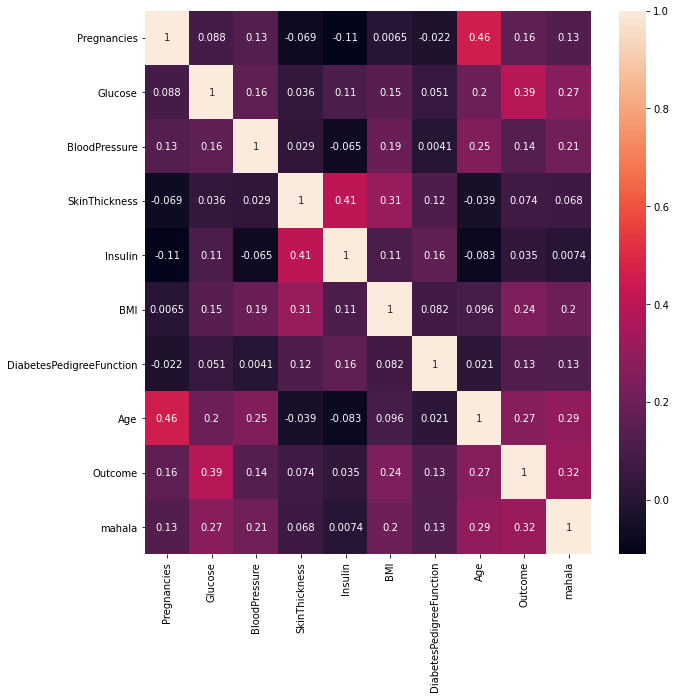

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
cor = datscale.corr(method="kendall")
sns.heatmap(cor, annot=True)
plt.show()

# Split Training Testing Data

In [187]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.2,random_state=0)

# Make Model

In [193]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True)
 
# fitting the model for grid search
grid.fit(xTrain, yTrain)

D:\Application\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Application\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Application\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\Application\Anaconda\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [194]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)


In [197]:
from sklearn.metrics import classification_report, confusion_matrix
grid_predictions = grid.predict(xTest)
 
# print classification report
print(classification_report(yTest, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       105
         1.0       0.76      0.57      0.65        49

    accuracy                           0.81       154
   macro avg       0.79      0.74      0.76       154
weighted avg       0.80      0.81      0.80       154



In [200]:
print(grid.score(xTest, yTest)*100, "%")

80.51948051948052 %
